## Solusi Numerik Persamaan Schrodinger Sistem Bermassa Kompleks Pada Potensial Kotak

**Dimodifikasi dari program: I Wayan Sudiarta**
<br><br>Solusi analitik dalam penyelesaian persamaan Schroedinger dengan sistem bermassa kompleks dimensi satu yang terdiri dari bagian riil  𝑚𝑅=1  (konstan) dan bagian imajjiner ( 𝑚𝐼1−  dan  𝑚𝐼2+ ).
<br>Last update: 08-Nov-2021

In [1]:
%matplotlib inline

from numpy import linalg as la
import numpy as np
import matplotlib.pyplot as plt

### Menyelesaikan persamaan Schrodinger

In [2]:
# Buat matriks tridiagonal untuk pers. Schrodinger
# jumlah grid
N = 100

# spasi/selang \Delta x 
L = 10.0
dx = L/N

# complex mass
m = np.ones(N-1, dtype = complex)

# assign values for mass
mi = 0.0j
for i in range(len(m)):
    if (i+1) < N//2:
        m[i] = 1 - mi
    elif (i+1) == N//2:
        m[i] = 1
    else:
        m[i] = 1 + mi
        

# alpha_i = 1/m_i
alpha = 1/m 

# membentuk matriks H
h1 = np.diag( 2*alpha[0:N-1], k = 0)   # diagonal
h2 = np.diag(-1*alpha[1:N-1], k = -1)  # below
h3 = np.diag(-1*alpha[0:N-2], k = 1)   # above

# matriks
h = h1 + h2 + h3

Catatan: w berisi nilai-nilai eigen dan v berisi vektor-vektor eigen. 

In [3]:
# Hitung nilai eigen
w, v = la.eig(h)

In [4]:
energi = w/(2*dx**2)
#energi

In [5]:
# Nilai energi ground state
gs = np.min(np.real(energi))

# indeks pada array
igs = np.argmin(np.real(energi))

# cetak hasil
print(gs, igs, energi[igs])

0.049343963426841 39 (0.049343963426841+0j)


In [6]:
# Plot fungsi gelombang keadaan dasar
# tambahkan psi = 0 di batas
psi = np.concatenate(([0j],v[:,igs],[0j]), axis = 0)
psi_r = np.concatenate(([0],v[:,igs].real,[0]), axis = 0)
psi_i = np.concatenate(([0],v[:,igs].imag,[0]), axis = 0)

# posisi x
x0 = L/2
x = np.arange(N+1)*dx - x0

# normalisasi
norm = float(np.sqrt(np.sum(np.conj(psi)*psi)*dx).real)
psi = psi/norm
norm

0.31622776601683794

In [7]:
#mengurutkan energi dari terkecil ke terbesar
#dari keadaan dasar hingga eksitasi
indeks_sort = np.argsort(energi)
energi2 = energi[indeks_sort]
print(energi2)

[4.93439634e-02+0.j 1.97327157e-01+0.j 4.43803540e-01+0.j
 7.88529869e-01+0.j 1.23116594e+00+0.j 1.77127493e+00+0.j
 2.40832381e+00+0.j 3.14168389e+00+0.j 3.97063143e+00+0.j
 4.89434837e+00+0.j 5.91192310e+00+0.j 7.02235141e+00+0.j
 8.22453743e+00+0.j 9.51729475e+00+0.j 1.08993476e+01+0.j
 1.23693320e+01+0.j 1.39257973e+01+0.j 1.55672074e+01+0.j
 1.72919426e+01+0.j 1.90983006e+01+0.j 2.09844988e+01+0.j
 2.29486757e+01+0.j 2.49888930e+01+0.j 2.71031373e+01+0.j
 2.92893219e+01+0.j 3.15452894e+01+0.j 3.38688135e+01+0.j
 3.62576010e+01+0.j 3.87092946e+01+0.j 4.12214748e+01+0.j
 4.37916622e+01+0.j 4.64173205e+01+0.j 4.90958584e+01+0.j
 5.18246326e+01+0.j 5.46009500e+01+0.j 5.74220708e+01+0.j
 6.02852109e+01+0.j 6.31875447e+01+0.j 6.61262080e+01+0.j
 6.90983006e+01+0.j 7.21008894e+01+0.j 7.51310113e+01+0.j
 7.81856759e+01+0.j 8.12618685e+01+0.j 8.43565535e+01+0.j
 8.74666766e+01+0.j 9.05891687e+01+0.j 9.37209480e+01+0.j
 9.68589241e+01+0.j 1.00000000e+02+0.j 1.03141076e+02+0.j
 1.06279052e+0

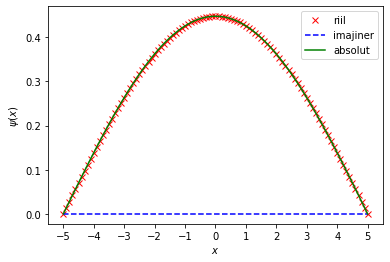

In [8]:
#plot fungsi gelombang
#keadaan ke n = 0, 1, . . .
n = 0
psin = v[:, indeks_sort[n]]
psin = np.insert(psin, 0, 0)
psin = np.insert(psin, len(psin),0)
psin = psin/norm

plt.plot(x, psin.real, 'rx')
plt.plot(x, psin.imag, '--b')
plt.xticks(np.arange(-5, 6))
plt.plot(x, np.absolute(psin), 'g')
plt.legend(["riil", "imajiner", "absolut"], loc= "upper right", prop={'size':10})

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')

plt.savefig('E:\\scriptpsi\\grafik\\fungsigelombang\\psi_num_m'+ str(mi) +'n' + str(n)+'.png', dpi=500,  bbox_inches="tight")
plt.show()

In [9]:
# Compute current
dd = (psin[2:(N+1)] - psin[0:(N-1)])/(2*dx)
jj = (np.conj(psin[1:N])*dd - psin[1:N]*np.conj(dd))/(2*1j*m)

# Take real part and add jj = 0 at the boundary
arus = np.concatenate(([0],jj.real,[0]), axis = 0)
arus_i = np.concatenate(([0],jj.imag,[0]), axis = 0)

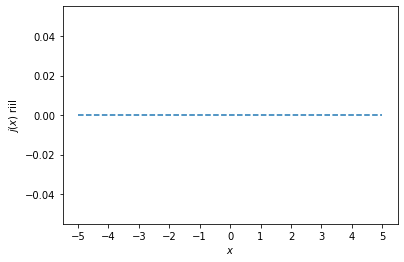

In [10]:
#arus riil
plt.plot(x, arus, '--', markersize=3)
plt.xticks(np.arange(-5, 6))
plt.savefig('E:\\scriptpsi\\grafik\\arus\\j_num_m'+ str(mi) +'n' + str(n)+'.png', dpi=500,  bbox_inches="tight")
plt.xlabel('$x$')
plt.ylabel ('$j(x)$ riil')
plt.show()

In [11]:
#simpan array sebagai file csv
from numpy import asarray
from numpy import savetxt

#simpan fungsi gelombang
savetxt('E:\scriptpsi\data\psi_numerik_realm'+str(mi)+'n'+str(n)+'.csv', psin.real, delimiter=',')
savetxt('E:\scriptpsi\data\psi_numerik_imagm'+str(mi)+'n'+str(n)+'.csv', psin.imag, delimiter=',')
savetxt('E:\scriptpsi\data\psi_numerik_absm'+str(mi)+'n'+str(n)+'.csv', np.absolute(psin), delimiter=',')

#simpan arus densitas
savetxt('E:\scriptpsi\data\j_numerik_realm'+str(mi)+'n'+str(n)+'.csv', arus, delimiter=',')